<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

C:\Users\rbarr\AppData\Local\Temp\ipykernel_22600\3268625996.py:17: RuntimeWarning: overflow encountered in multiply
  zz = zz*zz + Z
C:\Users\rbarr\AppData\Local\Temp\ipykernel_22600\3268625996.py:17: RuntimeWarning: invalid value encountered in multiply
  zz = zz*zz + Z


[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.3 -1.3 -1.3 -1.3 -1.3 -1.3 -1.3 -1.3 -1.3 -1.3]
 [-0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]]


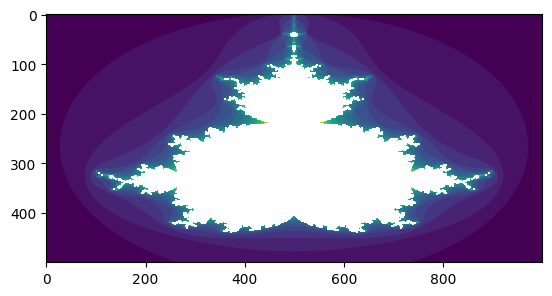

In [78]:
# à vous de jouer
import numpy as np
from matplotlib import pyplot as plt
N = 20
def vect_min(i, x):
    return min(i,x)
vect_min = np.vectorize(vect_min)
def mandelbrot(w, h):
    v = np.meshgrid(np.linspace(-2,0.8, num = w),np.linspace(-1.4,1.4, num = h),indexing = 'ij')
    X,Y = v
    Z = X + 1.j*Y
    diverge = np.full((w, h), np.inf)
    
    zz = Z
    H = np.absolute(zz) > 2
    for i in range (N+1):
        zz = zz*zz + Z
        H = np.absolute(zz) > 2 
        diverge[H] = vect_min(i, diverge[H])
    return diverge
 
mandelbrot(50,100)
v = np.meshgrid(np.linspace(-2,0.8, num = 5),np.linspace(-1.4,1.4, num = 10),indexing = 'ij')
a,b = v
a = vect_min(0,a)
print(a)
#np.full?
plt.imshow(mandelbrot(500,1000))
plt.show()

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook